# Classification

# Setup

In [1]:
# import library
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from warpped.collection import parse_chronnectome, get_mean_chronnectome, get_number_of_visit
from warpped.ml import warp_knn
# import gloabl variables
from warpped.global_variables import * 

In [4]:
# Global settings
sns.set_style("white")
pd.set_option('display.max_columns',999)
pd.set_option('display.max_row',300)

## Load HMM Result

In [5]:
# The selected model should be contained in global_variables, if wanna try different parameter then uncomment bleow 
# K_state=12; rep_num = 2

hmm_file = base+f'chronotype_k{K_state}_rep_{rep_num}.mat'
hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{rep_num}.mat'
hmminfo_file

'/home/jzni/dissertation/analysis/output/hmminfo/hmminfo_k10_rep_2.mat'

In [6]:
hmm = loadmat(hmm_file)
hmm_info = loadmat(hmminfo_file)

In [7]:
# Parse HMM info
state_order = np.squeeze(hmm_info['ord']) # the order of state for fo_corr and ordered_p
fo_corr = pd.DataFrame(hmm_info['fo_matrix'], columns=state_order, index=state_order)
ordered_p = pd.DataFrame(hmm_info['ordered_p'], columns=state_order, index=state_order)

## hmms = hmm_info['hmms']  # contains the subject specific hmm
# Parse chronnectome info
## info based on veterbi path 
raw_fo, lifetime, intervals = parse_chronnectome(hmm_info[hmminfo_source], model_selection=False)


## Load Behaviour Data

In [8]:
performance = pd.read_csv(f'{behav_dir}performance_proc.csv')
physio = pd.read_csv(f'{behav_dir}physio_proc.csv')
acti = pd.read_csv(f'{behav_dir}actigraph_proc.csv')
scales = pd.read_csv(f'{behav_dir}questionnaire_proc.csv')


In [9]:
fo_df =  pd.DataFrame(raw_fo, columns=[f'state{i}_fo' for i in range(1, K_state+1)])
lifetime_df = pd.DataFrame(get_mean_chronnectome(lifetime ), columns=[f'state{i}_life' for i in range(1, K_state+1)])
interval_df = pd.DataFrame(get_mean_chronnectome(intervals), columns=[f'state{i}_intervals' for i in range(1, K_state+1)])
visits_df = get_number_of_visit(lifetime)
visits_df.head()

,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits,state8_visits,state9_visits,state10_visits
0,11,11,7,7,9,13,8,14,7,6
1,9,11,9,11,11,11,6,13,10,6
2,9,11,4,11,11,2,7,28,11,10
3,8,15,5,9,0,11,8,12,9,14
4,11,4,5,13,12,10,6,14,18,12


In [10]:
chronnectome_df = pd.concat([fo_df,lifetime_df, interval_df, visits_df], axis=1).applymap(lambda x: round(float(x),2))
chronnectome_df.head()

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,state8_fo,state9_fo,state10_fo,state1_life,state2_life,state3_life,state4_life,state5_life,state6_life,state7_life,state8_life,state9_life,state10_life,state1_intervals,state2_intervals,state3_intervals,state4_intervals,state5_intervals,state6_intervals,state7_intervals,state8_intervals,state9_intervals,state10_intervals,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits,state8_visits,state9_visits,state10_visits
0,0.16,0.09,0.10,0.07,0.14,0.12,0.08,0.14,0.07,0.04,6.45,3.64,6.71,4.29,6.78,4.15,4.25,4.64,4.43,2.83,34.00,32.50,34.0,67.50,39.38,29.08,44.14,28.85,62.83,28.40,11.0,11.0,7.0,7.0,9.0,13.0,8.0,14.0,7.0,6.0
1,0.09,0.09,0.08,0.11,0.13,0.11,0.08,0.09,0.12,0.10,4.56,3.55,4.00,4.64,5.45,4.64,6.17,3.00,5.30,7.17,44.25,37.20,47.5,36.90,35.80,29.80,71.20,34.00,41.44,48.80,9.0,11.0,9.0,11.0,11.0,11.0,6.0,13.0,10.0,6.0
2,0.09,0.11,0.04,0.10,0.10,0.02,0.06,0.22,0.14,0.12,4.67,4.55,4.25,3.91,4.27,4.00,3.71,3.61,5.55,5.50,46.25,33.80,80.0,28.90,29.70,115.00,58.00,11.67,38.60,36.67,9.0,11.0,4.0,11.0,11.0,2.0,7.0,28.0,11.0,10.0
3,0.10,0.16,0.04,0.10,0.00,0.11,0.10,0.16,0.10,0.13,5.75,4.80,3.40,4.89,0.00,4.64,5.75,5.92,4.89,4.21,51.71,24.36,102.0,45.75,0.00,31.10,47.43,27.36,44.12,28.15,8.0,15.0,5.0,9.0,0.0,11.0,8.0,12.0,9.0,14.0
4,0.10,0.04,0.04,0.12,0.11,0.10,0.07,0.11,0.17,0.14,4.00,4.75,3.40,4.08,4.25,4.60,5.33,3.50,4.33,5.08,32.40,24.00,99.0,30.17,31.55,39.33,74.20,30.62,20.35,31.82,11.0,4.0,5.0,13.0,12.0,10.0,6.0,14.0,18.0,12.0


<AxesSubplot:>

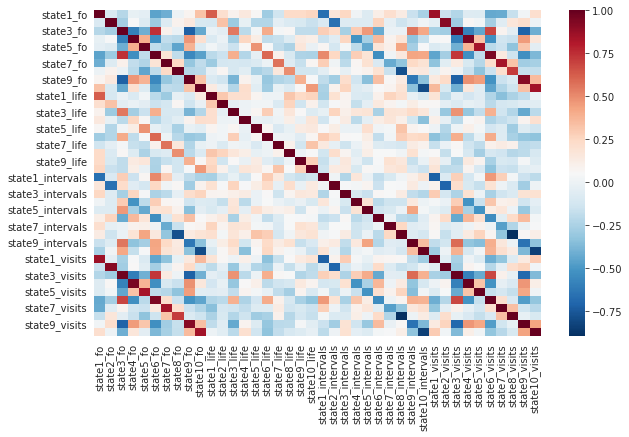

In [11]:
# FO matrix
plt.figure(figsize=(10,6))
sns.heatmap(chronnectome_df.corr(),cmap='RdBu_r')

## Label Encoding


In [12]:
# Chronotype Encoding
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(performance[['Type']])
chrono_array = oe_results.toarray()[:,0]
chrono_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
# Session Encoding 
# ... do this in a better way
ses_list = []
for ses in [0, 1, 2]:
    ses_list += [ses for i in range(37)]
ses_array = np.array(ses_list)
ses_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

# KNN classifier

In [14]:
# run PCA on FO Matrix, compress FO to 2D
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

pca = decomposition.PCA(n_components=2)
chronnectome_df_reduced = pca.fit_transform(chronnectome_df)
dim1 = chronnectome_df_reduced[:,0]; dim2 = chronnectome_df_reduced[:,1]


In [15]:
cluster_df = pd.DataFrame([])
cluster_df['dim1'] = (dim1 - dim1.mean())/dim1.std()
cluster_df['dim2'] = (dim2 - dim2.mean())/dim2.std()
cluster_df['chro_type'] =  chrono_array 
cluster_df['time'] = ses_array
cluster_df

,dim1,dim2,chro_type,time
0,0.260765,-0.213538,1.0,0
1,-0.283871,-0.447661,1.0,0
2,-0.823249,-0.175101,1.0,0
3,-0.794758,0.401899,1.0,0
4,-0.979073,0.166025,1.0,0
5,1.654387,0.526563,1.0,0
6,0.063405,-1.271790,1.0,0
7,1.053893,0.036166,1.0,0
8,-0.223788,-0.100685,1.0,0
9,-0.831221,-0.301787,1.0,0


In [16]:
X = cluster_df[['dim1', 'dim2']].values
n_neighbors = 3

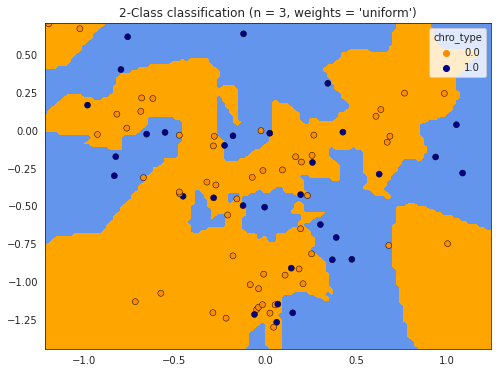

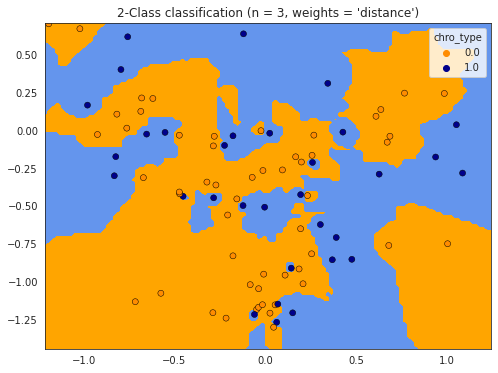

In [17]:
#KNN (N=3) Target=Chronotype
y = cluster_df.chro_type

# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

warp_knn(X,y,n_neighbors, cmap_light, cmap_bold)
# E type as 1, L as 0


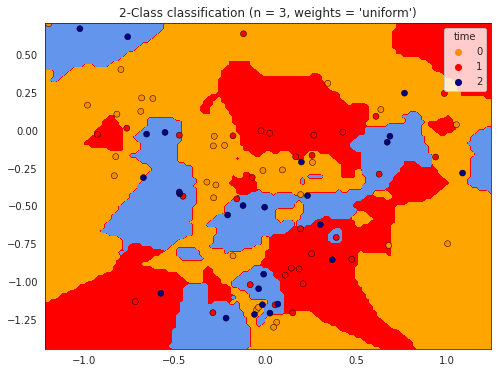

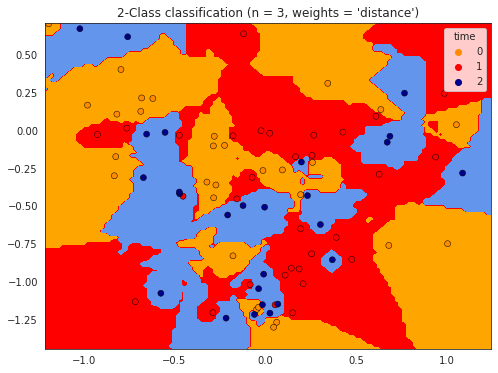

In [18]:
#KNN (N=3) Target=Time of day
y = cluster_df.time

from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(["orange","red", "cornflowerblue"])
cmap_bold = ["darkorange", "red","darkblue"]

warp_knn(X,y,n_neighbors, cmap_light, cmap_bold)
# 0 M ; 1 A; 2 E

# RF

In [19]:
ml_df = chronnectome_df.copy()
ml_df['chro_type'] =  chrono_array 
ml_df['time'] = ses_array
ml_df.head()

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,state8_fo,state9_fo,state10_fo,state1_life,state2_life,state3_life,state4_life,state5_life,state6_life,state7_life,state8_life,state9_life,state10_life,state1_intervals,state2_intervals,state3_intervals,state4_intervals,state5_intervals,state6_intervals,state7_intervals,state8_intervals,state9_intervals,state10_intervals,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits,state8_visits,state9_visits,state10_visits,chro_type,time
0,0.16,0.09,0.10,0.07,0.14,0.12,0.08,0.14,0.07,0.04,6.45,3.64,6.71,4.29,6.78,4.15,4.25,4.64,4.43,2.83,34.00,32.50,34.0,67.50,39.38,29.08,44.14,28.85,62.83,28.40,11.0,11.0,7.0,7.0,9.0,13.0,8.0,14.0,7.0,6.0,1.0,0
1,0.09,0.09,0.08,0.11,0.13,0.11,0.08,0.09,0.12,0.10,4.56,3.55,4.00,4.64,5.45,4.64,6.17,3.00,5.30,7.17,44.25,37.20,47.5,36.90,35.80,29.80,71.20,34.00,41.44,48.80,9.0,11.0,9.0,11.0,11.0,11.0,6.0,13.0,10.0,6.0,1.0,0
2,0.09,0.11,0.04,0.10,0.10,0.02,0.06,0.22,0.14,0.12,4.67,4.55,4.25,3.91,4.27,4.00,3.71,3.61,5.55,5.50,46.25,33.80,80.0,28.90,29.70,115.00,58.00,11.67,38.60,36.67,9.0,11.0,4.0,11.0,11.0,2.0,7.0,28.0,11.0,10.0,1.0,0
3,0.10,0.16,0.04,0.10,0.00,0.11,0.10,0.16,0.10,0.13,5.75,4.80,3.40,4.89,0.00,4.64,5.75,5.92,4.89,4.21,51.71,24.36,102.0,45.75,0.00,31.10,47.43,27.36,44.12,28.15,8.0,15.0,5.0,9.0,0.0,11.0,8.0,12.0,9.0,14.0,1.0,0
4,0.10,0.04,0.04,0.12,0.11,0.10,0.07,0.11,0.17,0.14,4.00,4.75,3.40,4.08,4.25,4.60,5.33,3.50,4.33,5.08,32.40,24.00,99.0,30.17,31.55,39.33,74.20,30.62,20.35,31.82,11.0,4.0,5.0,13.0,12.0,10.0,6.0,14.0,18.0,12.0,1.0,0


In [20]:
from pycaret.classification import *
clf1 = setup(data = ml_df, target = 'chro_type',preprocess = True, silent=True,session_id=123)

,Description,Value
0,session_id,123
1,Target,chro_type
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(111, 42)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
# Train the model
rf = create_model('rf')
tuned_rf = tune_model(rf, optimize = 'Accuracy',early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.2667,0.0000,0.0000,0.0000,-0.2308,-0.2928
1,0.8750,0.9667,1.0000,0.7500,0.8571,0.7500,0.7746
2,0.6250,0.5667,0.3333,0.5000,0.4000,0.1429,0.1491
3,0.7500,0.7667,1.0000,0.6000,0.7500,0.5294,0.6000
4,0.6250,0.6667,0.3333,0.5000,0.4000,0.1429,0.1491
5,0.6250,0.7333,0.6667,0.5000,0.5714,0.2500,0.2582
6,0.7500,0.6875,0.7500,0.7500,0.7500,0.5000,0.5000
7,0.5714,0.7500,0.6667,0.5000,0.5714,0.1600,0.1667
8,0.5714,0.8333,0.3333,0.5000,0.4000,0.0870,0.0913


In [22]:
# Train the model
rf = create_model('rf')
tuned_rf = tune_model(rf, optimize = 'Accuracy',early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.2667,0.0000,0.0000,0.0000,-0.2308,-0.2928
1,0.8750,0.9667,1.0000,0.7500,0.8571,0.7500,0.7746
2,0.6250,0.5667,0.3333,0.5000,0.4000,0.1429,0.1491
3,0.7500,0.7667,1.0000,0.6000,0.7500,0.5294,0.6000
4,0.6250,0.6667,0.3333,0.5000,0.4000,0.1429,0.1491
5,0.6250,0.7333,0.6667,0.5000,0.5714,0.2500,0.2582
6,0.7500,0.6875,0.7500,0.7500,0.7500,0.5000,0.5000
7,0.5714,0.7500,0.6667,0.5000,0.5714,0.1600,0.1667
8,0.5714,0.8333,0.3333,0.5000,0.4000,0.0870,0.0913


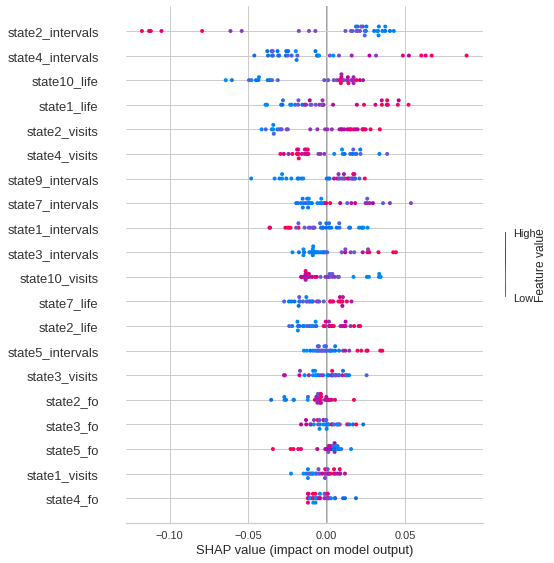

In [23]:
interpret_model(rf,plot='summary')

In [24]:
ml_df2 = fo_df.copy()
ml_df2['chro_type'] =  chrono_array 


In [25]:
from pycaret.classification import *
clf1 = setup(data = ml_df2, 
             target = 'chro_type',
             preprocess = True,
             silent=True,
             session_id=123)

,Description,Value
0,session_id,123
1,Target,chro_type
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(111, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
# Train the model
rf = create_model('rf')
tuned_rf = tune_model(rf, optimize = 'Accuracy',early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3750,0.4000,0.3333,0.2500,0.2857,-0.2500,-0.2582
1,0.7500,0.7333,0.3333,1.0000,0.5000,0.3846,0.4880
2,0.7500,0.6667,0.6667,0.6667,0.6667,0.4667,0.4667
3,0.6250,0.7333,0.6667,0.5000,0.5714,0.2500,0.2582
4,0.6250,0.7333,0.6667,0.5000,0.5714,0.2500,0.2582
5,0.8750,1.0000,1.0000,0.7500,0.8571,0.7500,0.7746
6,0.7500,0.8125,0.5000,1.0000,0.6667,0.5000,0.5774
7,0.8571,0.7500,1.0000,0.7500,0.8571,0.7200,0.7500
8,0.5714,0.6667,0.3333,0.5000,0.4000,0.0870,0.0913


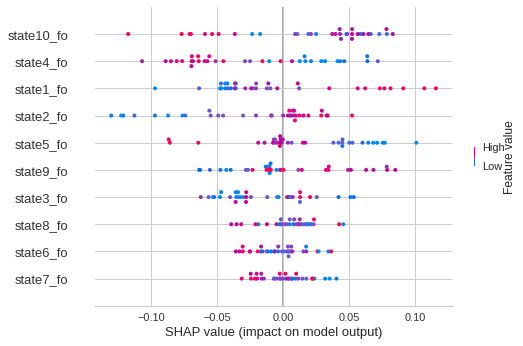

In [27]:
interpret_model(rf,plot='summary')